In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
df = pd.read_csv('/Users/hadjer/Desktop/dataset_GAB.csv')
df

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
0,1,hiver,après-midi,0,NaN,"""jour l An""",800005027,"""CHERAGA \r""",17030,16,...,1655000,0,0,0,0,32,345000,"""jour l An""",32,345000
1,1,hiver,après-midi,0,NaN,"""jour l An""",800010027,"""DAR EL BEIDA \r""",17070,16,...,2169000,0,0,0,0,43,1008000,"""jour l An""",43,1008000
2,1,hiver,après-midi,0,NaN,"""jour l An""",800019027,"""ORAN USTO \r""",17100,31,...,1810000,0,0,0,0,20,355000,"""jour l An""",20,355000
3,1,hiver,après-midi,0,NaN,"""jour l An""",800022027,"""BEJAIA \r""",17130,6,...,709000,0,0,0,0,15,168000,"""jour l An""",15,168000
4,1,hiver,après-midi,0,NaN,"""jour l An""",800023027,"""BEJAIA \r""",17130,6,...,279000,0,0,0,0,5,80000,"""jour l An""",5,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,1,NaN,NaN,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,...,2000,1,2000,0,0,0,0,NaN,0,0
18433,53,hiver,soir,1,NaN,NaN,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,638000,52,638000,0,0,0,0,NaN,0,0
18434,53,hiver,soir,1,NaN,NaN,800043027,"""HASSI MESSAOUD \r""",17330,30,...,2000,1,2000,0,0,0,0,NaN,0,0
18435,53,hiver,soir,1,NaN,NaN,800145027,"""ORAN USTO \r""",17100,31,...,18000,3,18000,0,0,0,0,NaN,0,0


## Verification des valeurs manquantes

In [2]:
df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18437 entries, 0 to 18436
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   nbr_semaine                           18437 non-null  int64 
 1   saison                                18437 non-null  object
 2   Plage_horaire                         18437 non-null  object
 3   Week_End                              18437 non-null  int64 
 4   Evenements_Religieux                  3188 non-null   object
 5   Evenements_Nationaux                  1777 non-null   object
 6   Gab_Code                              18437 non-null  int64 
 7   GabAgence                             18437 non-null  object
 8   CodeAgence                            18437 non-null  int64 
 9   CodeWilaya                            18437 non-null  int64 
 10  position_Geographique                 18437 non-null  object
 11  Nbr_Transaction_Semaine     

nbr_semaine                                 0
saison                                      0
Plage_horaire                               0
Week_End                                    0
Evenements_Religieux                    15249
Evenements_Nationaux                    16660
Gab_Code                                    0
GabAgence                                   0
CodeAgence                                  0
CodeWilaya                                  0
position_Geographique                       0
Nbr_Transaction_Semaine                     0
retrait_Semaine                             0
Nbr_Transaction_Weekend                     0
retrait_Weekend                             0
Nbr_Transaction_Evenements_Religieux        0
retrait_Evenements_Religieux                0
Nbr_Transaction_Evenements_Nationaux        0
retrait_Evenements_Nationaux                0
evenements                              13472
nbr_transaction_evenement                   0
retrait_evenement                 

##### il n ya pas de valeurs manquantes.

## Identification des valeurs aberrantes:

### 1-Identification des outliers univariées

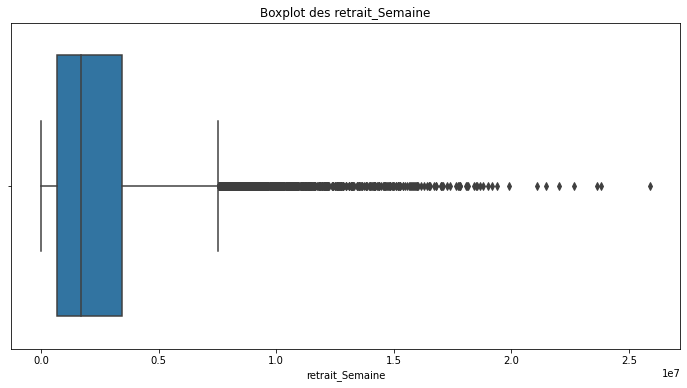

In [3]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Semaine')
plt.xlabel('retrait_Semaine')
plt.title("Boxplot des retrait_Semaine")
plt.show()

In [7]:
#upper_lim=df['retrait_Semaine'].quantile(.95): Cette ligne calcule le 95e percentile 
#des valeurs dans la colonne 'retrait_Semaine'. Cela signifie que 95% des valeurs de 
#cette colonne sont inférieures ou égales à cette limite.
upper_lim=df['retrait_Semaine'].quantile(.95)
df_outliers=df[df['retrait_Semaine']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
218,1,hiver,matin,0,NaN,"""jour l An""",800071027,"""SKIKDA \r""",17600,21,...,7829000,0,0,0,0,0,0,"""jour l An""",0,0
431,2,hiver,matin,1,NaN,Nouvel an amazigh,800045027,"""HUSSEIN DEY \r""",17350,16,...,9028000,108,2283000,0,0,34,775000,Nouvel an amazigh,34,775000
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,14222000,150,3120000,0,0,171,5469000,Nouvel an amazigh,171,5469000
436,2,hiver,matin,1,NaN,Nouvel an amazigh,800071027,"""SKIKDA \r""",17600,21,...,15471000,13,263000,0,0,161,4262000,Nouvel an amazigh,161,4262000
440,2,hiver,matin,1,NaN,Nouvel an amazigh,800078027,"""ARZEW \r""",17670,31,...,7851000,76,2094000,0,0,49,1639000,Nouvel an amazigh,49,1639000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079,52,hiver,matin,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,12603000,1,2000,0,0,0,0,NaN,0,0
18100,52,hiver,après-midi,1,NaN,NaN,800046027,"""ANNABA II \r""",17360,23,...,10637000,0,0,0,0,0,0,NaN,0,0
18101,52,hiver,après-midi,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,10470000,0,0,0,0,0,0,NaN,0,0
18103,52,hiver,après-midi,1,NaN,NaN,800176027,"""ORAN SOUMAM \r""",17440,31,...,8334000,0,0,0,0,0,0,NaN,0,0


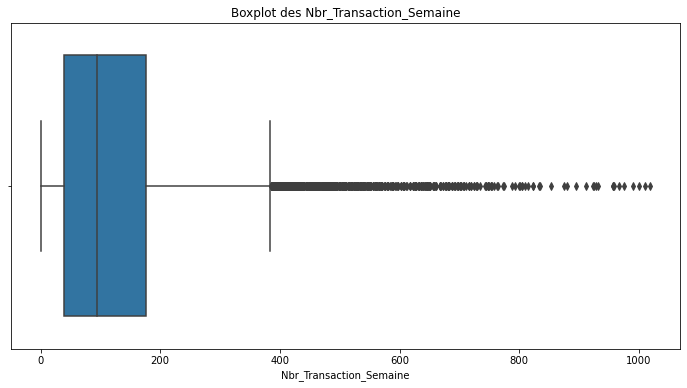

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Nbr_Transaction_Semaine')
plt.xlabel('Nbr_Transaction_Semaine')
plt.title("Boxplot des Nbr_Transaction_Semaine")
plt.show()

In [10]:
upper_lim=df['Nbr_Transaction_Semaine'].quantile(.95)
df_outliers=df[df['Nbr_Transaction_Semaine']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
218,1,hiver,matin,0,NaN,"""jour l An""",800071027,"""SKIKDA \r""",17600,21,...,0,"""jour l An""",0,0,-1,-1,1,1,1,1
431,2,hiver,matin,1,NaN,Nouvel an amazigh,800045027,"""HUSSEIN DEY \r""",17350,16,...,775000,Nouvel an amazigh,34,775000,-1,-1,1,1,1,1
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,5469000,Nouvel an amazigh,171,5469000,-1,-1,-1,-1,-1,-1
436,2,hiver,matin,1,NaN,Nouvel an amazigh,800071027,"""SKIKDA \r""",17600,21,...,4262000,Nouvel an amazigh,161,4262000,-1,-1,1,1,-1,-1
460,2,hiver,matin,1,NaN,Nouvel an amazigh,800205027,"""AGENCE JIJEL \r""",17770,18,...,3223000,Nouvel an amazigh,131,3223000,1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,52,hiver,soir,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,-1,-1,-1,1,1,1
18079,52,hiver,matin,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,0,NaN,0,0,-1,-1,1,1,1,1
18100,52,hiver,après-midi,1,NaN,NaN,800046027,"""ANNABA II \r""",17360,23,...,0,NaN,0,0,-1,-1,1,1,1,1
18101,52,hiver,après-midi,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,0,NaN,0,0,-1,-1,1,1,1,1


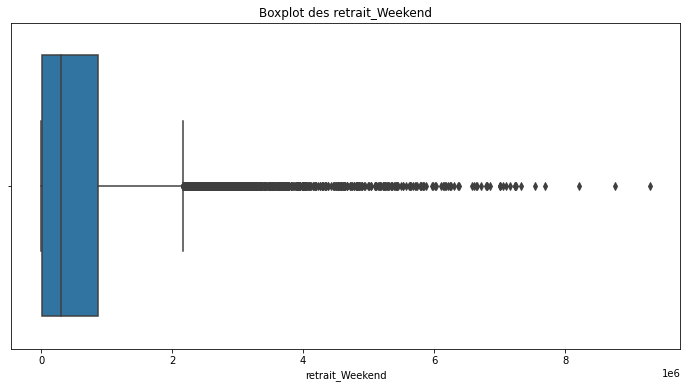

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Weekend')
plt.xlabel('retrait_Weekend')
plt.title("Boxplot des retrait_Weekend")
plt.show()

In [12]:
upper_lim=df['retrait_Weekend'].quantile(.95)
df_outliers=df[df['retrait_Weekend']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
368,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,0,Nouvel an amazigh,0,0,1,1,-1,1,1,1
429,2,hiver,matin,1,NaN,Nouvel an amazigh,800039027,"""SETIF \r""",17290,19,...,0,Nouvel an amazigh,0,0,1,1,-1,-1,1,1
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,5469000,Nouvel an amazigh,171,5469000,-1,-1,-1,-1,-1,-1
435,2,hiver,matin,1,NaN,Nouvel an amazigh,800058027,"""BOUMERDES II \r""",17470,35,...,0,Nouvel an amazigh,0,0,1,1,-1,1,1,1
468,2,hiver,matin,1,NaN,Nouvel an amazigh,800217027,"""HUSSEIN DEY \r""",17350,16,...,714000,Nouvel an amazigh,31,714000,1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,53,hiver,matin,1,NaN,NaN,800222027,"""DRARIA \r""",17110,16,...,0,NaN,0,0,1,1,-1,1,1,1
18298,53,hiver,matin,1,NaN,NaN,800228027,"""LES SOURCES \r""",17210,16,...,0,NaN,0,0,1,1,-1,1,1,1
18387,53,hiver,soir,1,NaN,NaN,800177027,"""HASSI MESSAOUD \r""",17330,30,...,0,NaN,0,0,1,1,-1,-1,1,1
18405,53,hiver,soir,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,1,1,-1,-1,1,1


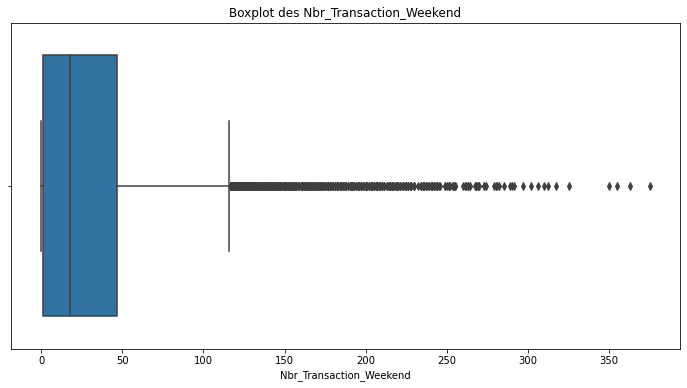

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Nbr_Transaction_Weekend')
plt.xlabel('Nbr_Transaction_Weekend')
plt.title("Boxplot des Nbr_Transaction_Weekend")
plt.show()

In [14]:
upper_lim=df['Nbr_Transaction_Weekend'].quantile(.95)
df_outliers=df[df['Nbr_Transaction_Weekend']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
365,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800039027,"""SETIF \r""",17290,19,...,0,Nouvel an amazigh,0,0,1,1,-1,-1,1,1
405,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,532000,Nouvel an amazigh,36,532000,1,1,1,-1,1,1
407,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800222027,"""DRARIA \r""",17110,16,...,929000,Nouvel an amazigh,59,929000,1,1,1,-1,1,1
429,2,hiver,matin,1,NaN,Nouvel an amazigh,800039027,"""SETIF \r""",17290,19,...,0,Nouvel an amazigh,0,0,1,1,-1,-1,1,1
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,5469000,Nouvel an amazigh,171,5469000,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18290,53,hiver,matin,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,1,1,-1,-1,1,1
18387,53,hiver,soir,1,NaN,NaN,800177027,"""HASSI MESSAOUD \r""",17330,30,...,0,NaN,0,0,1,1,-1,-1,1,1
18404,53,hiver,soir,1,NaN,NaN,800218027,"""STAOUELI \r""",17090,16,...,0,NaN,0,0,1,1,1,-1,1,1
18405,53,hiver,soir,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,1,1,-1,-1,1,1


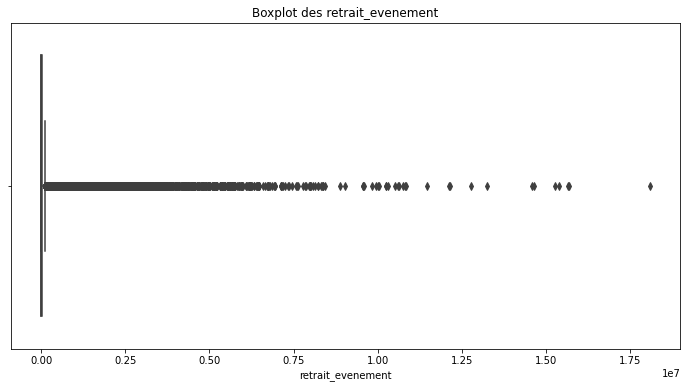

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_evenement')
plt.xlabel('retrait_evenement')
plt.title("Boxplot des retrait_evenement")
plt.show()

In [16]:
upper_lim=df['retrait_evenement'].quantile(.95)
df_outliers=df[df['retrait_evenement']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
395,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800205027,"""AGENCE JIJEL \r""",17770,18,...,1719000,Nouvel an amazigh,93,1719000,1,1,1,1,1,-1
401,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800214027,"""CHLEF \r""",17570,2,...,2218000,Nouvel an amazigh,96,2218000,1,1,1,1,-1,-1
406,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800221027,"""ANNABA II \r""",17360,23,...,2429000,Nouvel an amazigh,92,2429000,1,1,1,1,-1,-1
408,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800224027,"""KOLEA \r""",17240,42,...,2621000,Nouvel an amazigh,132,2621000,1,1,1,1,-1,-1
409,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800225027,"""TLEMCEN \r""",17320,13,...,1752000,Nouvel an amazigh,86,1752000,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,44,automne,matin,1,NaN,Jour de Révolution,800131027,"""Canstantineadl \r""",17530,25,...,2382000,Jour de Révolution,130,2382000,-1,-1,-1,-1,-1,-1
15283,44,automne,matin,1,NaN,Jour de Révolution,800208027,"""BIRKHADEM \r""",17120,16,...,1668000,Jour de Révolution,59,1668000,1,1,1,1,1,1
15299,44,automne,matin,1,NaN,Jour de Révolution,800228027,"""LES SOURCES \r""",17210,16,...,1827000,Jour de Révolution,69,1827000,-1,1,-1,-1,-1,1
15454,44,automne,matin,1,NaN,Jour de Révolution,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,1785000,Jour de Révolution,111,1785000,1,1,1,1,-1,-1


##### Méthode d'isolation forest univariée:

In [17]:
from sklearn.ensemble import IsolationForest

# Liste des noms des variables numériques
variables_numeriques = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'Nbr_Transaction_Weekend', 'retrait_evenement', 'nbr_transaction_evenement']

# Paramètres de l'Isolation Forest
contamination = 0.05  # Proportion d'outliers attendue dans les données
random_state = 42  # Pour assurer la reproductibilité des résultats

# Initialisation d'un dictionnaire pour enregistrer les indices des outliers pour chaque variable
indices_outliers_par_variable = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Création du modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=random_state)
    
    # Ajustement du modèle aux données
    isolation_forest.fit(df[[variable]])
    
    # Prédiction des outliers
    df['outlier_' + variable] = isolation_forest.predict(df[[variable]])
    
    # Enregistrement des indices des outliers pour la variable actuelle
    indices_outliers_par_variable[variable] = df.index[df['outlier_' + variable] == -1].tolist()

# Affichage des outliers détectés pour chaque variable et enregistrement des indices
for variable in variables_numeriques:
    print(f"Outliers détectés pour la variable '{variable}':")
    print(df[df['outlier_' + variable] == -1][[variable]])
    print("Indices des outliers:", indices_outliers_par_variable[variable])
    print("\n")

Outliers détectés pour la variable 'retrait_Semaine':
       retrait_Semaine
218            7829000
431            9028000
432           14222000
436           15471000
440            7851000
...                ...
18079         12603000
18100         10637000
18101         10470000
18103          8334000
18159          8552000

[921 rows x 1 columns]
Indices des outliers: [218, 431, 432, 436, 440, 466, 626, 777, 789, 804, 810, 820, 821, 935, 987, 989, 1154, 1160, 1161, 1166, 1176, 1181, 1188, 1200, 1201, 1515, 1521, 1810, 1826, 1871, 1876, 1877, 1886, 1893, 1902, 1941, 2176, 2238, 2239, 2243, 2244, 2252, 2307, 2541, 2550, 2590, 2598, 2606, 2611, 2612, 2624, 2626, 2641, 2651, 2653, 2654, 2657, 2967, 2968, 2974, 2983, 3012, 3263, 3315, 3327, 3331, 3332, 3340, 3342, 3349, 3358, 3360, 3366, 3368, 3370, 3404, 3628, 3679, 3691, 3692, 3697, 3701, 3704, 3705, 3732, 3736, 3992, 3995, 3996, 4007, 4014, 4024, 4033, 4046, 4048, 4050, 4051, 4053, 4055, 4059, 4060, 4061, 4063, 4065, 4066, 4077, 408